<a href="https://colab.research.google.com/github/fares-3adi/FraudDetectionProject/blob/main/CS3IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Using Machine Learning**

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Link to Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [10]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [12]:
df = pd.read_csv("creditcard (1).csv")

For reference: The column names are Time, V1 ... V28, Amount, and Class

## Performing Data Analysis

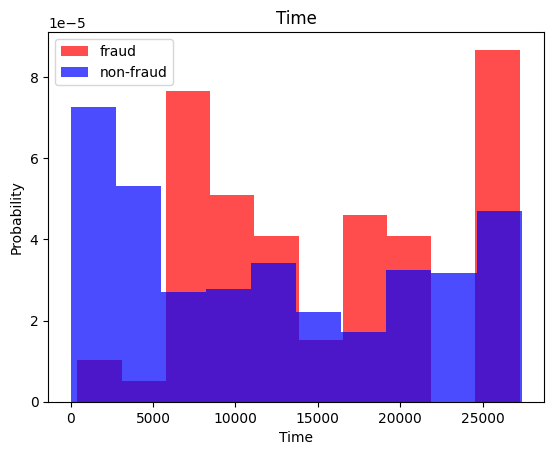

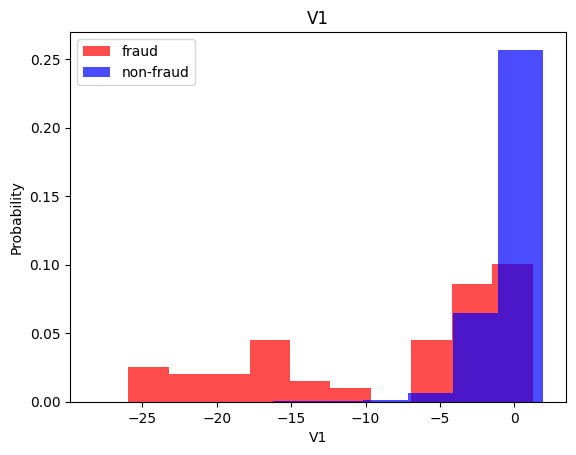

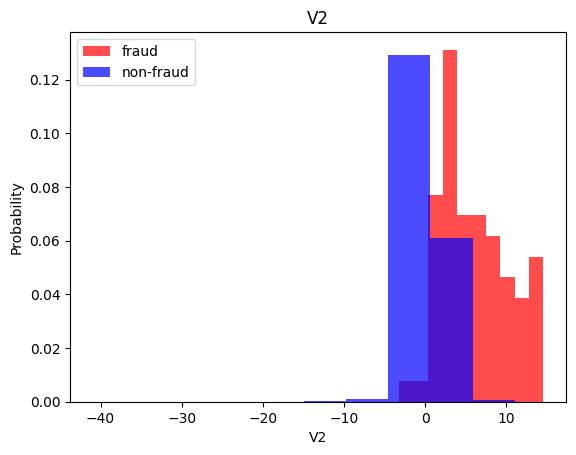

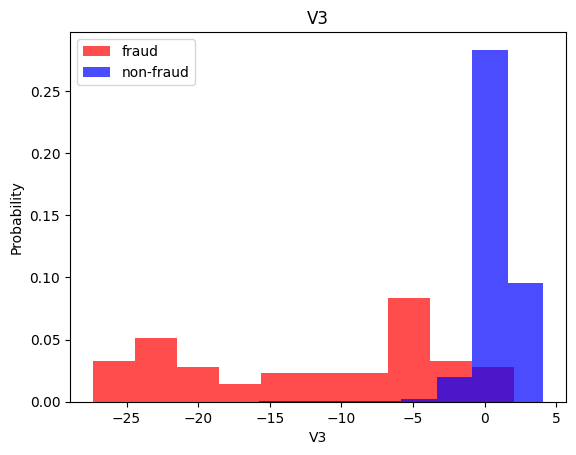

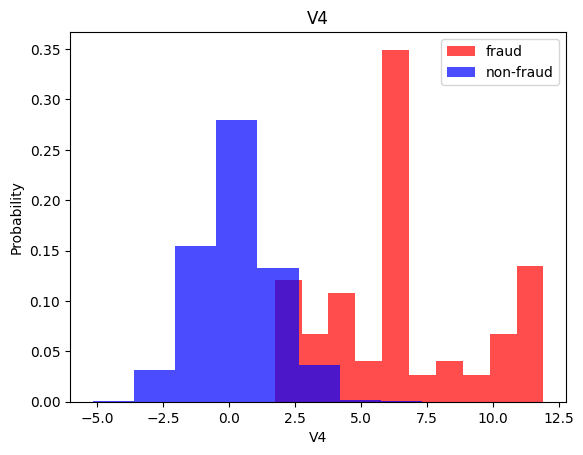

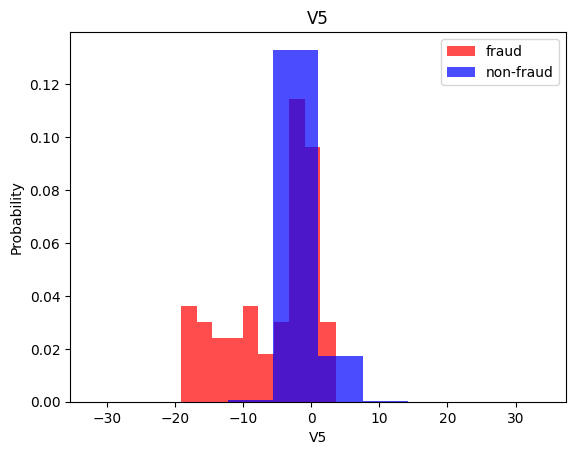

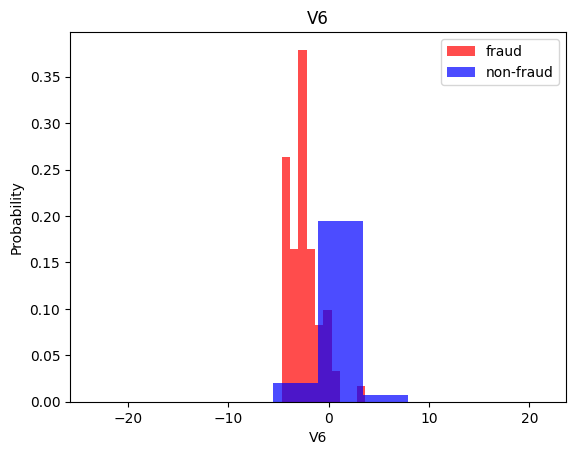

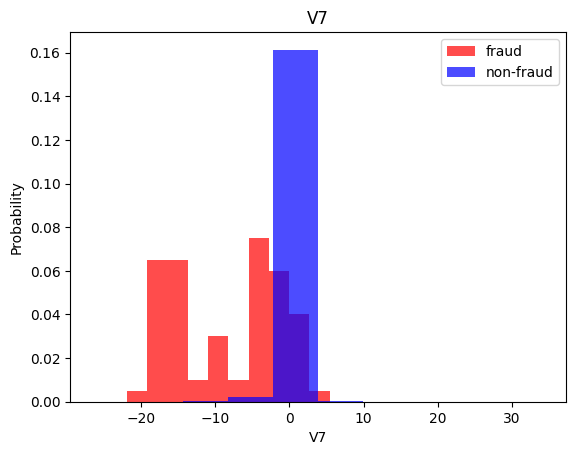

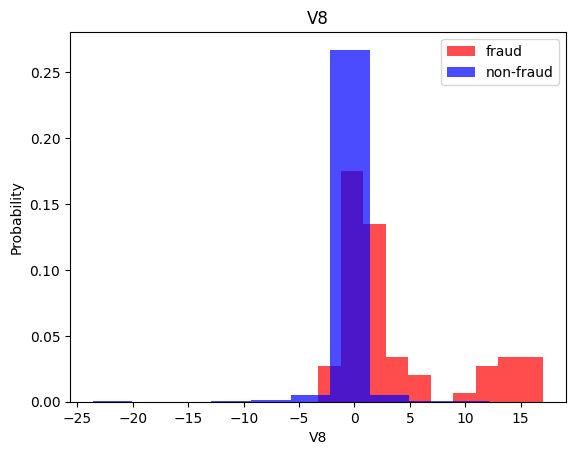

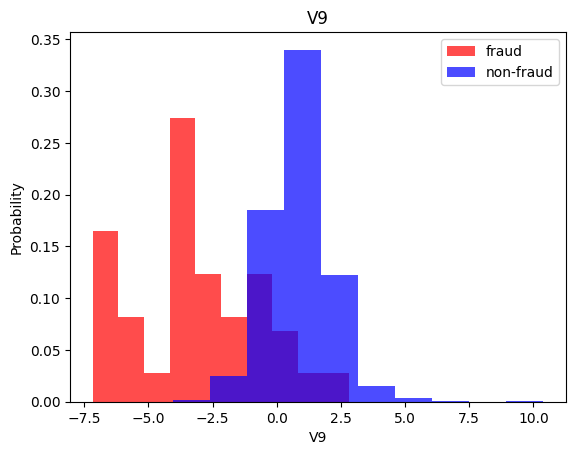

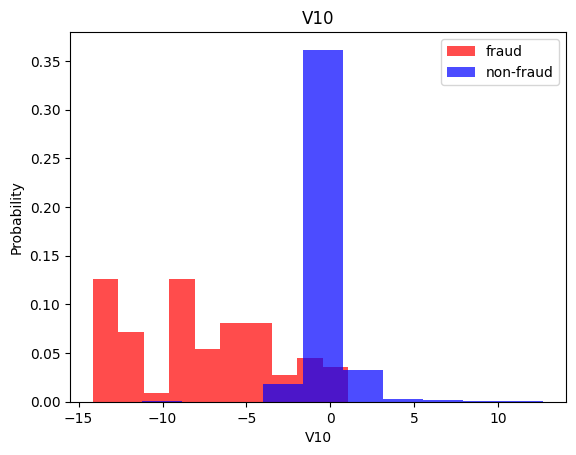

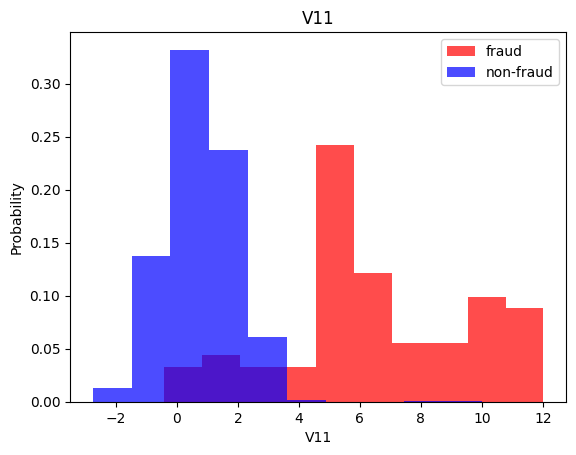

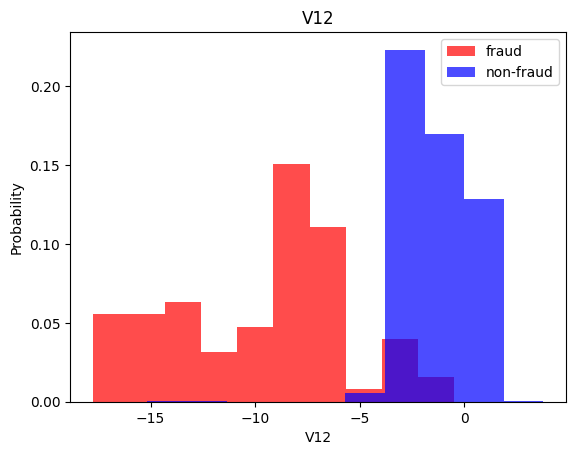

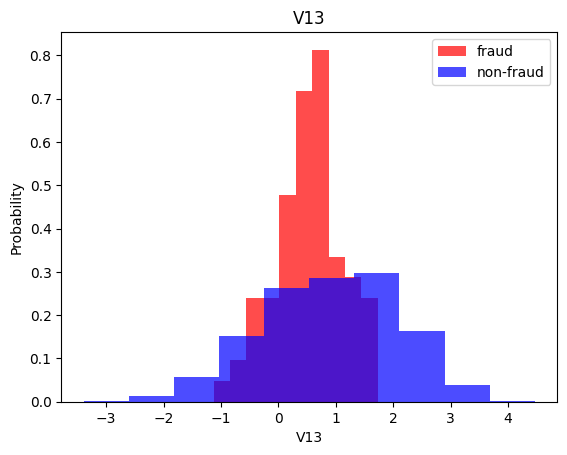

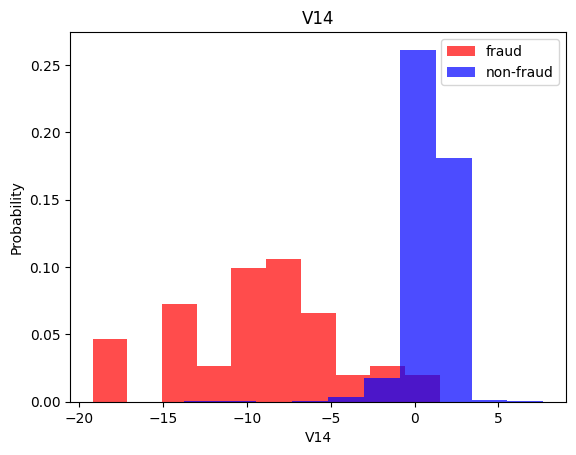

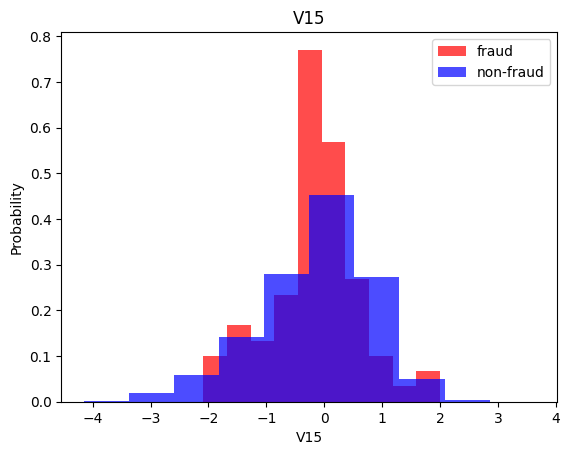

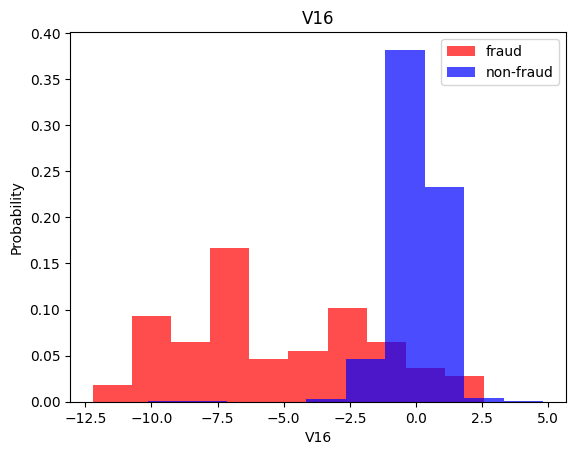

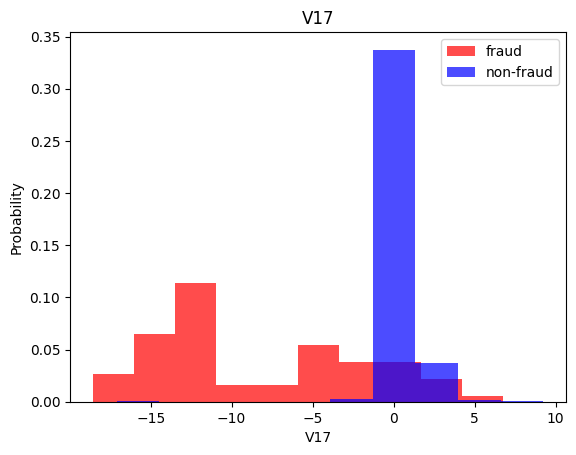

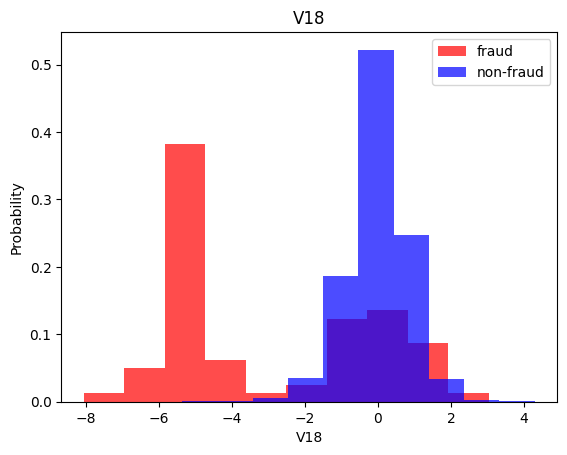

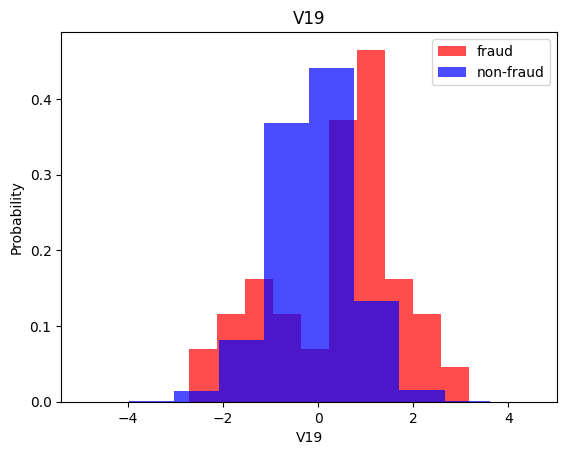

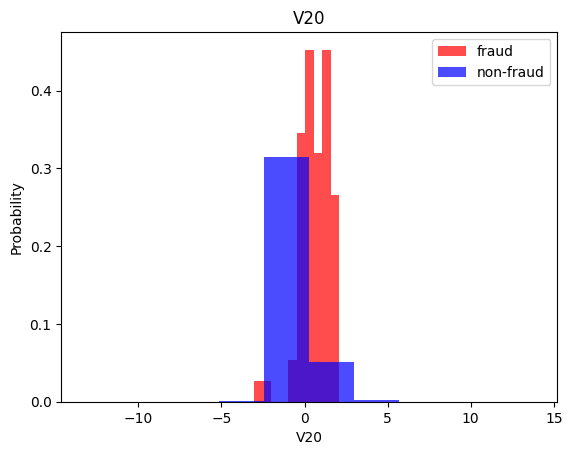

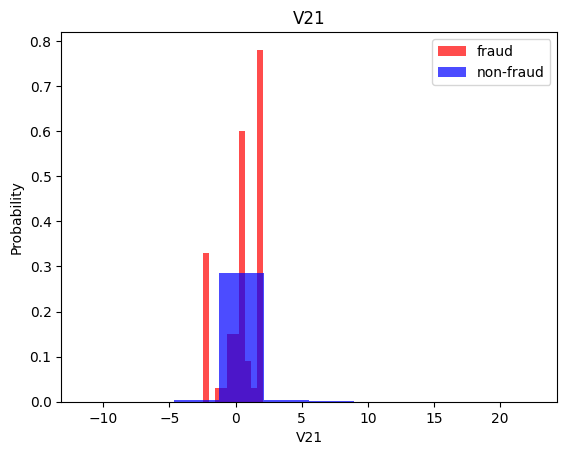

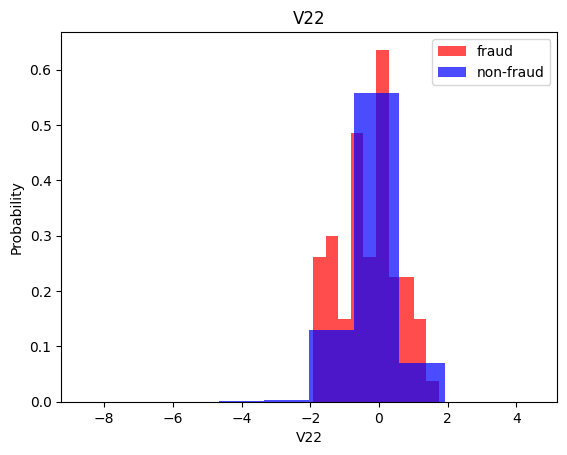

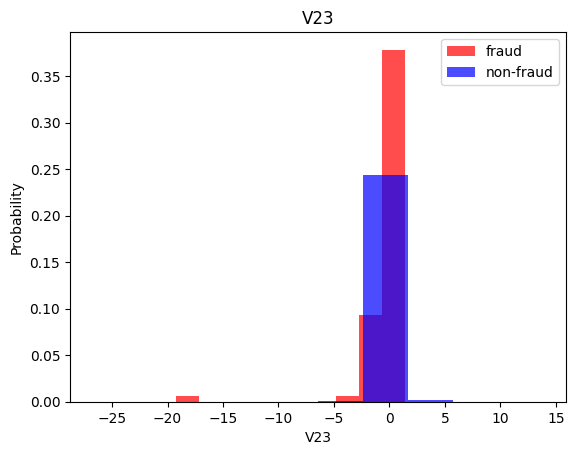

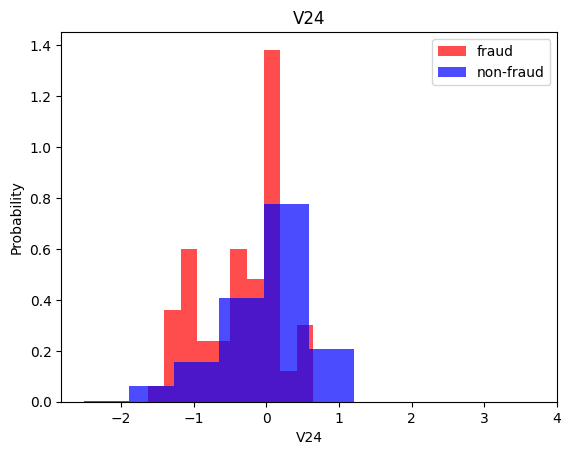

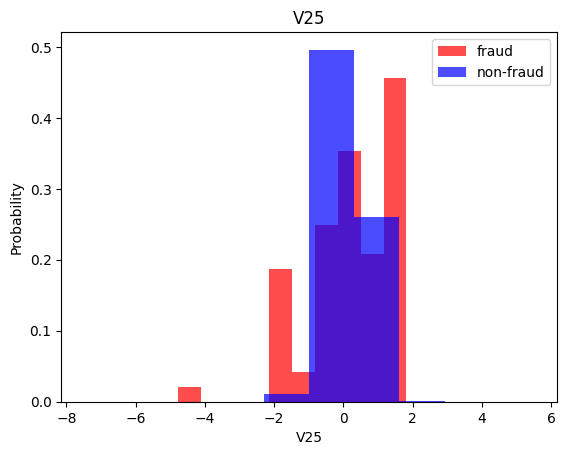

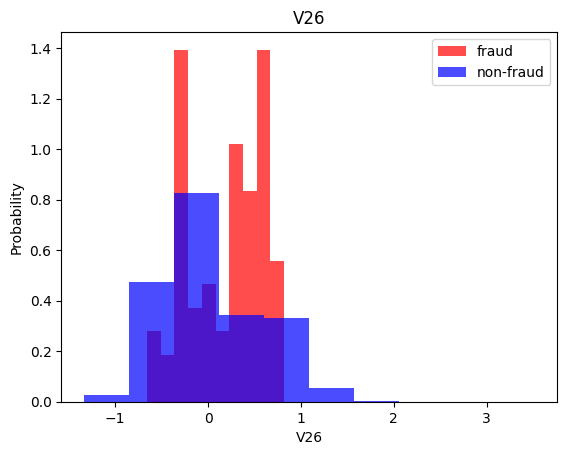

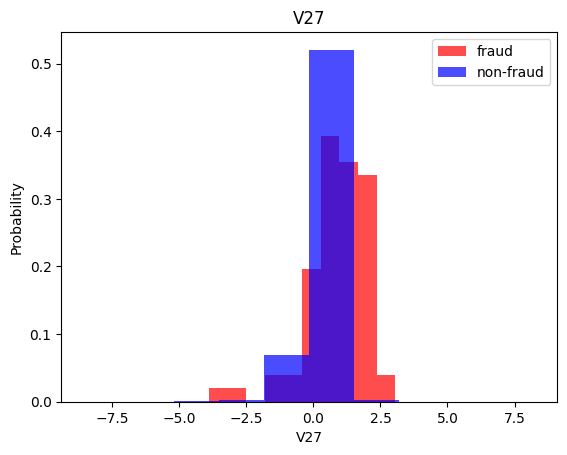

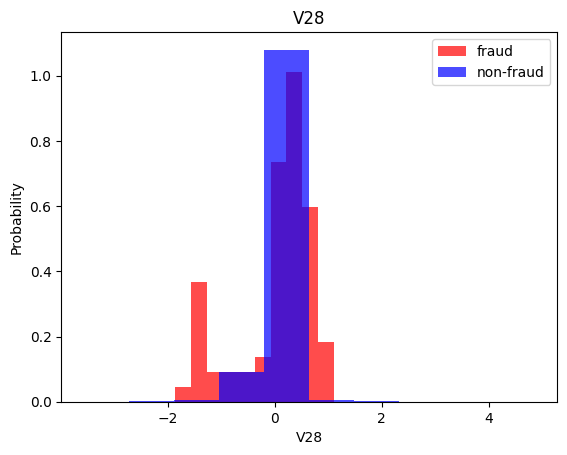

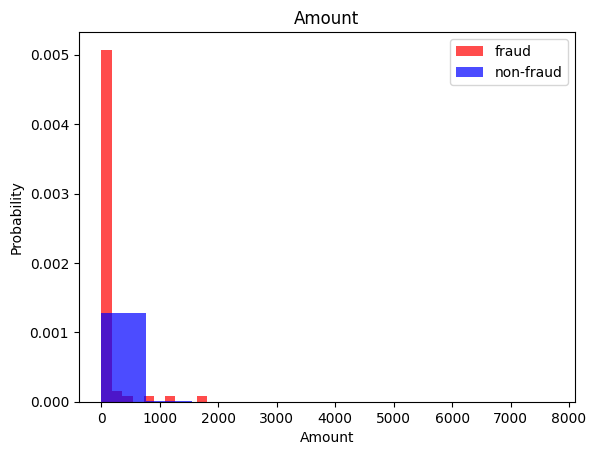

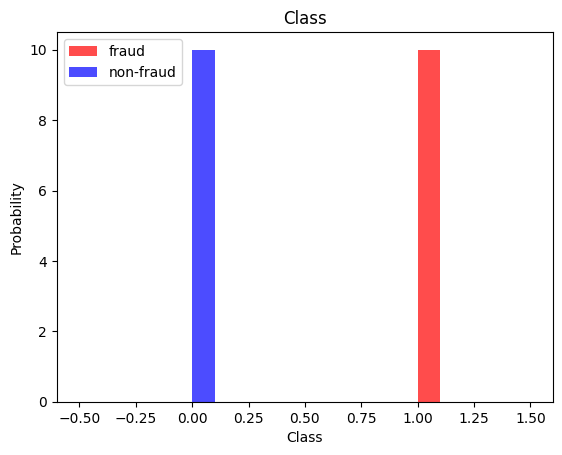

In [4]:
# Plotting a histogram for each label (fraud and non-fraud)
# To facilitate data analysis for the effect of features on the label
for label in df.columns:
  plt.hist(df[df["Class"]==1][label], color="red", label="fraud", alpha=0.7, density=True)
  plt.hist(df[df["Class"]==0][label], color="blue", label="non-fraud", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [13]:
# To detect whether there are null values in the data set
df.isnull().sum().max()
# In this case there are no null values meaning we do not
# have to employ any techniques to fill in missing data

0

In [14]:
# To better understand the split between the two classes
df.shape

(284807, 31)

In [15]:
# Splitting those entries based on class
df['Class'].value_counts()

,count
Class,
0,284315
1,492


This shows a total of 492 fraud cases out of a total of 284807 entries

In [18]:
# To further analyze the percentage of fraud cases
print(f"Percentage of Fraud (Class==1): {df['Class'].value_counts()[0]/len(df) * 100}%")
print(f"Percentage of Non-Fraud (Class==0): {df['Class'].value_counts()[1]/len(df) * 100}%")

Percentage of Fraud (Class==1): 99.82725143693798%
Percentage of Non-Fraud (Class==0): 0.1727485630620034%


It shows that only 0.172% of the dataset contains cases of fraud, while 99.82% is not fraud

This means the dataset is heavily skewed and that will need to be dealt with

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As can be seen from this sample of the dataset, columns V1 to V28 have been scaled, the only expceptions of scaling being the Time column and the Amount column